In [ ]:
#Load data
data_set = np.loadtxt('dataset.txt', delimiter=',')
x = data_set[:,0]
y = data_set[:,1]
z = data_set[:,2]

In [ ]:
#Data exploration
df = pd.DataFrame(data_set, columns = ['X','Y','Z'])
df

,X,Y,Z
0,6.10234,-5.112590,-2.628450
1,1.10971,-1.255890,0.386766
2,3.00289,-4.188050,-0.546627
3,1.40443,0.231926,-0.036297
4,4.21788,5.563220,-2.807510
...,...,...,...
95,4.73411,-4.899980,-1.681510
96,3.25086,-0.256255,-1.285430
97,2.21491,5.325900,-1.342920
98,5.80074,-1.100970,-2.986100


Data visualization


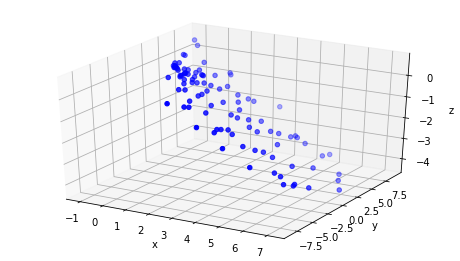

View (60,35)


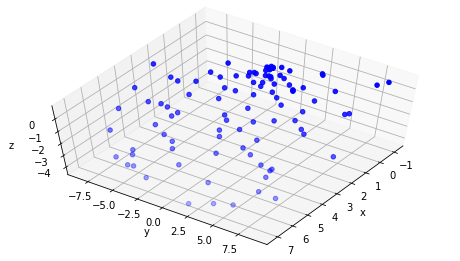

In [ ]:
#Data visualization
print('Data visualization')
fig = plt.figure(figsize=(8,10))
ax  = fig.add_subplot(211, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(x, y, z, color="b")
plt.show()

print('View (60,35)')
fig = plt.figure(figsize=(8,10))
ax  = fig.add_subplot(212, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(x, y, z, color="b")
ax.view_init(60,35)
plt.show()

### Define Data Shape
From graphical Visualization, it is shown that the data represents a plane.

**Plane Equation** : 

>$$
\begin{equation}
{\theta_1}x + {\theta_2}y + {\theta_3}z + {\theta_4} = 0 
\end{equation}
$$

**RANSAC Regressor** is used from sklearn library. RANSAC (RANdom SAmple Consensus)regression algorithm is an iterative algorithm for the robust estimation of parameters as it removes outliers from the training data set while fitting the model. Basically, it takes linear regression algorithm to the next level by excluding the outliers in the training dataset.

**RANSAC Regression Algorithm Details:**
1. Select a random number of examples to be inliers and train the model.
2. Test all other data points against the trained model.
3. Out of all the data points tested in step 2, select the points as inliers which fall within a user-given tolerance using median absolute deviation (MAD).
4. Retrain the model with all inliers data.
5. Estimate the error of the retrained model versus the inliers.
6. Follow step 1 to step 5
7. Terminate the algorithm execution if the model performance meets a certain user-defined threshold or if a fixed number of iterations were reached.  

Reference: https://vitalflux.com/ransac-regression-explained-with-python-examples/

### Rearranging Plane Equation
Our data is 3 dimensional, so in order to implement RANSAC, 2 dimensions are assigned as features and the third one is target. So, x_train is actually XY and y_train is Z.

This requires to rearrange the plane equation as follows:
>$$
\begin{equation}
{\theta_1}x + {\theta_2}y + {\theta_3}z + {\theta_4} = 0 
\end{equation}
$$

>$$
\begin{equation}
z = -{\theta_1 \over \theta_3}x - {\theta_2 \over \theta_3}y - {\theta_4 \over \theta_3} 
\end{equation}
$$

>$$
\begin{equation}
z = ax + by + d
\end{equation}
$$

where a, b are the plane coefficients and d is the intercept. 


### Selecting Hyper Parameters

Some of the important hyper parameters for the RANSAC algorithm includes maximum number of iterations, minimum number of samples, loss function, residual threshold need to be assigned. 


**Minimal Sample Set** : because we rearrange the plane equation, our MSS is 3 (a, b, d) instead of 4 

**Number of Iterations** : number of iteration is set to 100

**Threshold** : threshold value at which is model will terminate is assigned to 0.1 

Coefficients : [-0.71428604 -0.14285731]
intercept : 1.000000661685998


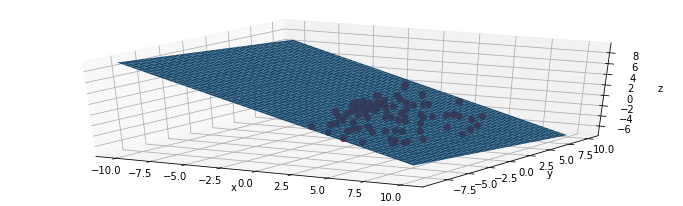

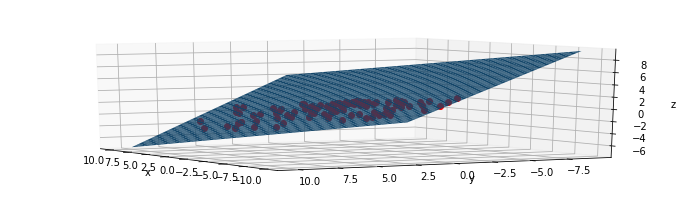

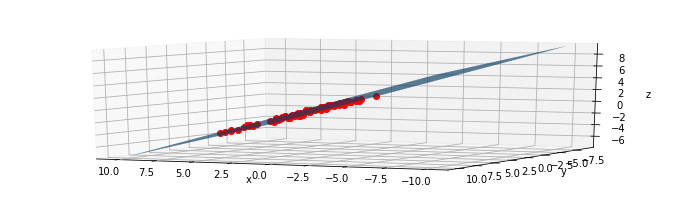

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, RANSACRegressor

X_train = data_set[:, (0,1)]
y_train = data_set[:,2]

ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=3, max_trials=100,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=0.1)
ransac.fit(X_train, y_train)

# the plane equation
z = lambda x,y: (ransac.estimator_.intercept_ +ransac.estimator_.coef_[0]*x +ransac.estimator_.coef_[1]*y) 
print(f'Coefficients : {ransac.estimator_.coef_}')
print(f'intercept : {ransac.estimator_.intercept_}')

xtmp = np.linspace(-10,10,50)
ytmp = np.linspace(-9,10,50)
x,y = np.meshgrid(xtmp,ytmp)

fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(311, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot3D(X_train[:,0], X_train[:,1], y_train, 'or')
ax.plot_surface(x, y, z(x,y))
plt.show()

fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(312, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot3D(X_train[:,0], X_train[:,1], y_train, 'or')
ax.plot_surface(x, y, z(x,y))
ax.view_init(10,150)
plt.show()

fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(313, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot3D(X_train[:,0], X_train[:,1], y_train, 'or')
ax.plot_surface(x, y, z(x,y))
ax.view_init(10,115)
plt.show()

### Substitute in Original Equation
>$$
\begin{equation}
z = ax + by + d
\end{equation}
$$

>$$
\begin{equation}
ax + by - z + d = 0
\end{equation}
$$

From RANSAC Regression: 

a = -0.71428604

b = -0.14285731

d = 1.000000661685998

So, our equation becomes : 
>$$
\begin{equation}
-0.71428604x + -0.14285731y - z + 1.000000661685998 = 0
\end{equation}
$$

Substituting with x, y, z of original data set, all points satisfy the obtained equation above as shown below. 


In [ ]:
res = ransac.estimator_.coef_[0]*X_train[:,0] + ransac.estimator_.coef_[1]*X_train[:,1] - y_train + ransac.estimator_.intercept_ 
np.around(res, decimals=3, out=None).astype(int) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])